In [38]:
import json 
import numpy as np
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import json

In [39]:
model = 'gpt2'
filter = 'filtered'
split = 'dev'
dataset = 'winobias'
top_heads = [(5,8), (5,10), (4,6), (5,9), (6,0)]
transposed = list(zip(*top_heads))
head_filter = (np.array(transposed[0]), np.array(transposed[1]))
print(head_filter)


# Plot y_{set-gender,z_set-gender}(u) - y_{set-gender,z_null(u)}(u) by
#  	 y_{null,z_set-gender(u)}(u) -  y_{null,z_null} (u)

fname = f"{dataset}_data/attention_intervention_{model}_{filter}_{split}.json"
with open(fname) as f:
	data = json.load(f)
x = []
y = []

for result in data['results']:
	y_null_z_set_gender = np.array(result['indirect_odds_head'])[head_filter]
	y_null_z_null = np.array(result['odds_base'])
	x.extend((y_null_z_set_gender - y_null_z_null).flatten().tolist())
	y_set_gender_z_set_gender = np.array(result['odds_alt'])
	y_set_gender_z_null = np.array(result['direct_odds_head'])[head_filter]
	y.extend((y_set_gender_z_set_gender - y_set_gender_z_null).flatten().tolist())
	
assert len(x) == len(y) == 5 * len(data['results'])
x = np.array(x)
y = np.array(y)

(array([5, 5, 4, 5, 6]), array([ 8, 10,  6,  9,  0]))


In [51]:
print(np.mean(y))
print(np.mean(x))

print(np.mean(y-x) / np.mean(x) )

print(np.mean((y-x)/x))

0.07036417339371347
0.0896865018849017
-0.2154429940414597
0.2688442503124997


CUTOFF 5
0.59540
0.8533200257189758


/anaconda3/envs/lmint/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


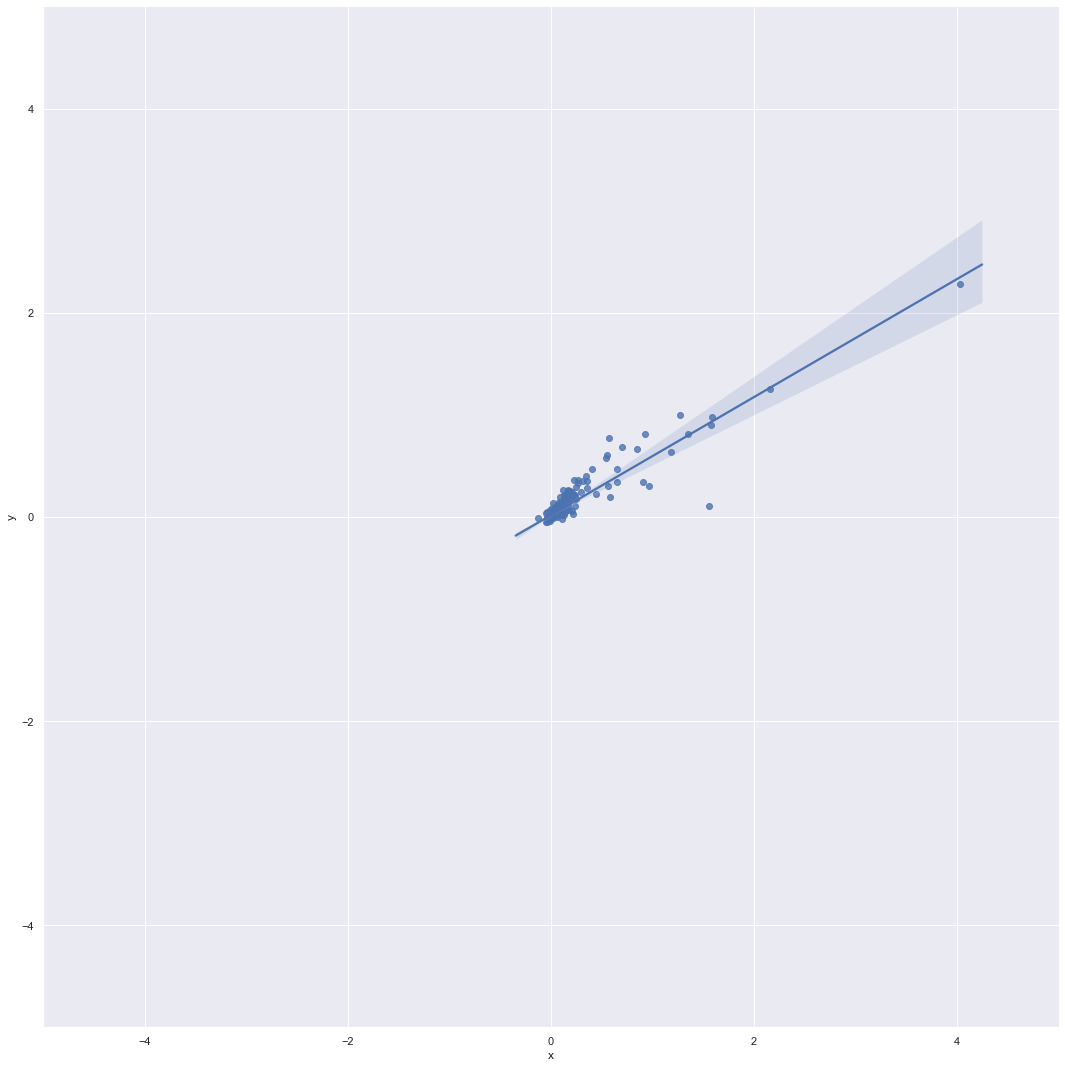

In [40]:
# data = np.array(zip(x, y))
cutoff = 5
print('CUTOFF', cutoff)
box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
# g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
g = sns.lmplot(x='x', y='y', data=df, size=15, aspect=1)
g.set(xlim=(-cutoff, cutoff))
g.set(ylim=(-cutoff, cutoff))

CUTOFF 1
0.76894
0.7777807274020568
0.052988721367058726
0.05689484923070563
-0.0686552107345916


/anaconda3/envs/lmint/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


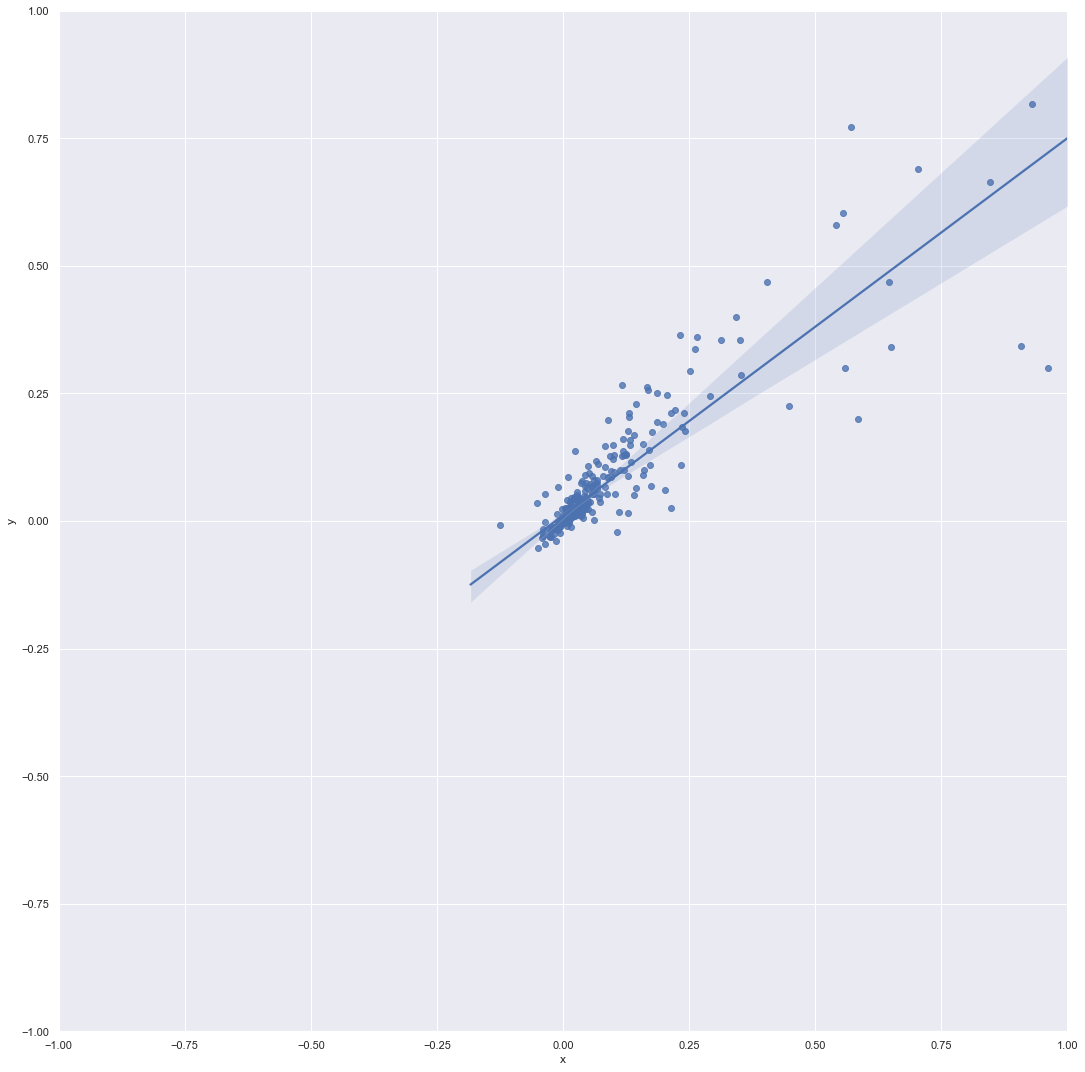

In [52]:
# data = np.array(zip(x, y))
cutoff = 1
print('CUTOFF', cutoff)
box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
# g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
g = sns.lmplot(x='x', y='y', data=df, size=15, aspect=1)
g.set(xlim=(-cutoff, cutoff))
g.set(ylim=(-cutoff, cutoff))

print(np.mean(y_box))
print(np.mean(x_box))
print(np.mean(y_box-x_box) / np.mean(x_box) )
# 
# print(np.mean((y-x)/x))

CUTOFF 0.1
[-1.43465854e-03  3.05903994e-03  7.90632807e-03  4.14071523e-03
  2.85484933e-03  1.32024753e-01 -9.73178112e-03 -4.19297334e-02
  4.71600775e-02  1.00921873e-02 -4.00515053e-03  2.56875005e-03
  4.62826934e-03 -1.98717567e-03  3.59946337e-03  1.00830907e-01
  1.86554784e-01  3.50844974e-01  5.22490684e-02  4.39711753e-02
  2.42355645e-01  2.13486135e-01  6.57028558e-02  1.75806105e-01
  1.19232834e-01 -4.00726000e-02 -3.61420313e-02  2.67604193e-02
  1.44890150e-02  6.71966878e-03  5.51317206e-03 -2.32758714e-02
 -6.28520974e-03 -1.19104577e-02  5.90543662e-04  1.60367068e-03
  4.02279464e-04  1.96903425e-02  5.33086833e-03  1.11681995e-03
  2.30844188e-02 -7.38961713e-04  3.83649039e-02 -7.40514519e-03
  9.37570809e-03  1.58633308e+00  2.15052413e-01  2.15762024e+00
  1.58081608e+00  5.85446166e-01  2.06175523e-01  6.96489388e-02
  2.61954027e-01  4.05009466e-01  1.33311468e-01  3.24351522e-02
 -2.86786822e-02  5.66991302e-02  2.83615323e-02  2.05956432e-02
  1.03416521e-

/anaconda3/envs/lmint/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


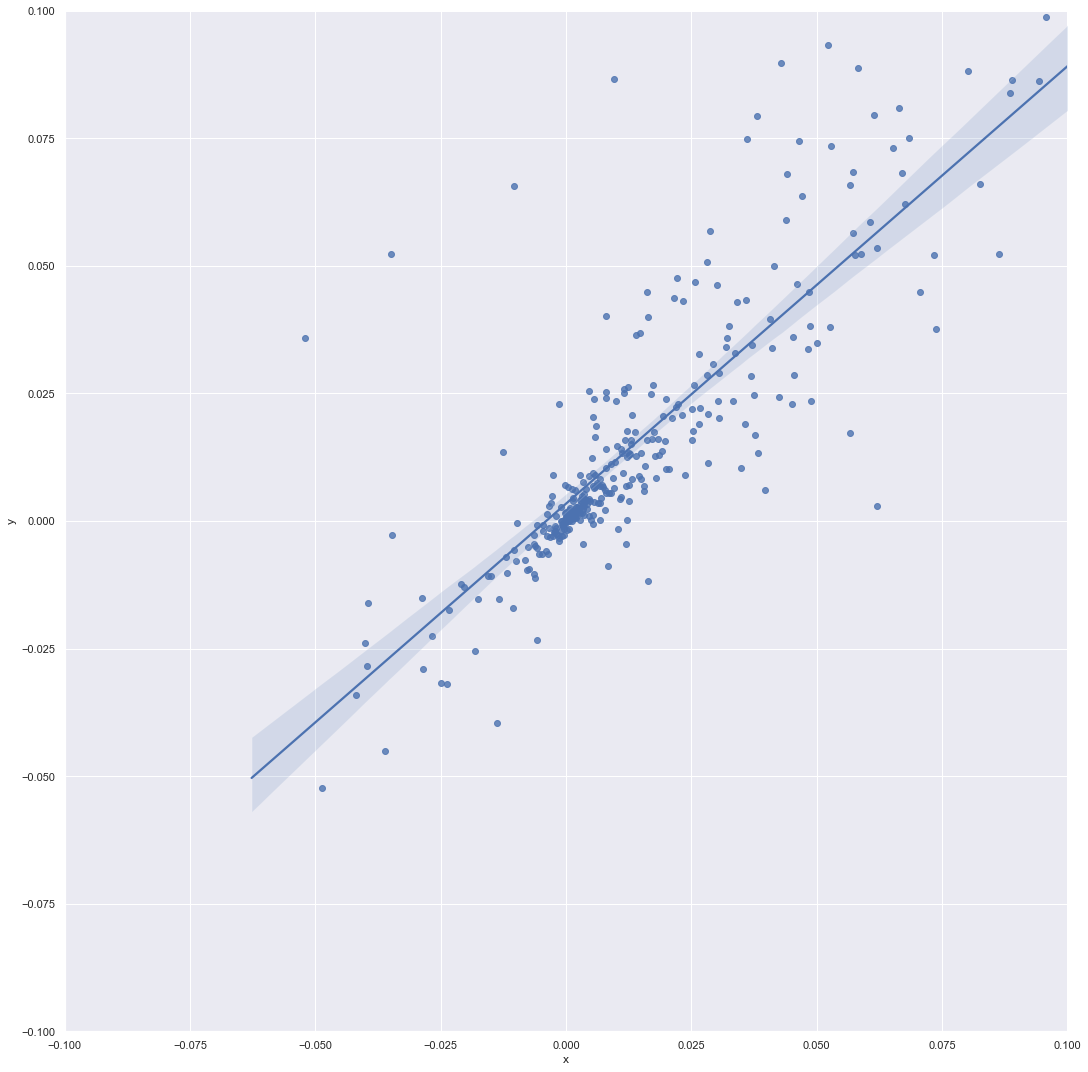

In [45]:
# data = np.array(zip(x, y))
cutoff = .1
print('CUTOFF', cutoff)

box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
print(x)
print('Dataset size before boxing:', x.size)
print('Dataset size after boxing:', x_box.size)
print('Fraction', ((x.size() - x_box.size())/x.size()))
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
# g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
g = sns.lmplot(x='x', y='y', data=df, size=15, aspect=1)
g.set(xlim=(-cutoff, cutoff))
g.set(ylim=(-cutoff, cutoff))

CUTOFF 1
Dataset size before boxing: 435
Dataset size after boxing: 427
Fraction 0.01839080459770115
0.76894
0.7777807274020568


/anaconda3/envs/lmint/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


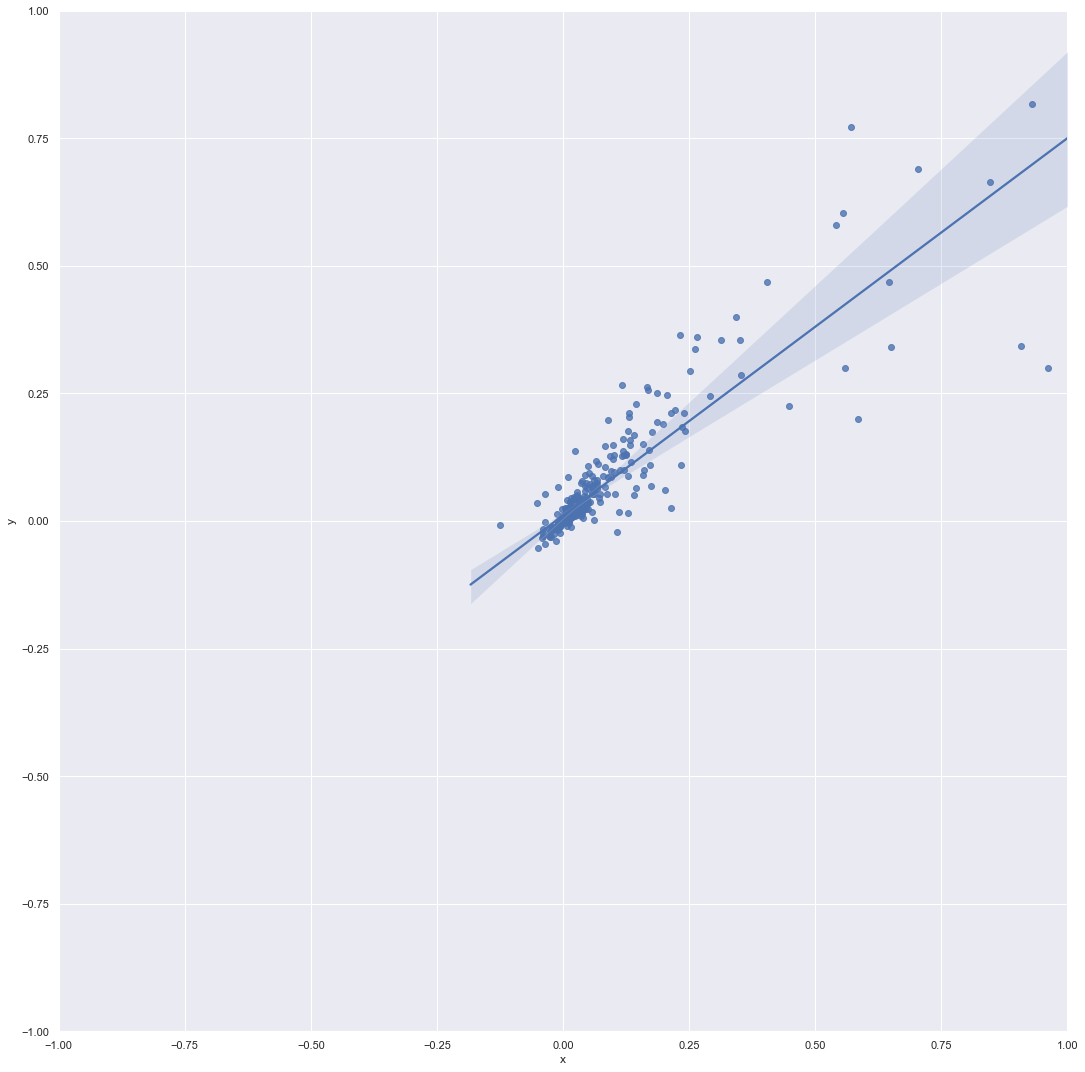

In [48]:
# data = np.array(zip(x, y))
cutoff = 1
print('CUTOFF', cutoff)

box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
print('Dataset size before boxing:', x.size)
print('Dataset size after boxing:', x_box.size)
print('Fraction', ((x.size - x_box.size)/x.size))
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
# g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
g = sns.lmplot(x='x', y='y', data=df, size=15, aspect=1)
g.set(xlim=(-cutoff, cutoff))
g.set(ylim=(-cutoff, cutoff))
